The Naive Bayes classifier is a simple classifier that classifies based on probabilities of events. It is the applied commonly to text classification.Let us consider sentence classification to classify a sentence to either ‘question’ or ‘statement’. In this case, there are two classes (“question” and “statement”). With the training set, we can train a Naive Bayes classifier which we can use to automatically categorize a new sentence.

Our training set will consist of four questions and statements.


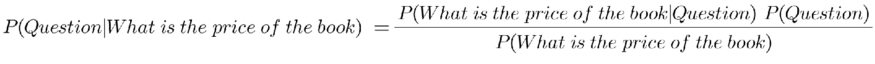
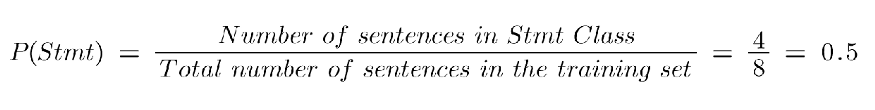
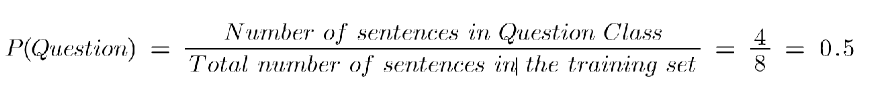
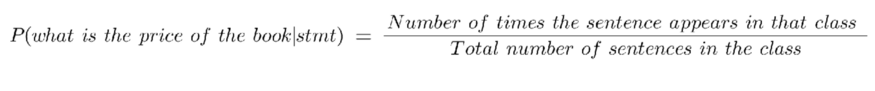
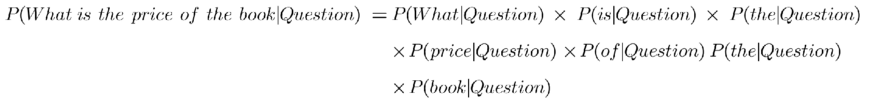
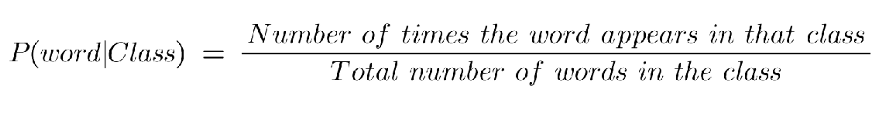

In [28]:
import pandas as pd

columns = ['sent', 'class']
rows = []

rows = [['This is my book', 'stmt'], 
        ['They are novels', 'stmt'],
        ['have you read this book', 'question'],
        ['who is the author', 'question'],
        ['what are the characters', 'question'],
        ['This is how I bought the book', 'stmt'],
        ['I like fictions', 'stmt'],
        ['What is this , is this a  chair', 'question'],
        ['what is your favorite book', 'question']]


training_data = pd.DataFrame(rows, columns=columns)
training_data

,sent,class
0,This is my book,stmt
1,They are novels,stmt
2,have you read this book,question
3,who is the author,question
4,what are the characters,question
5,This is how I bought the book,stmt
6,I like fictions,stmt
7,"What is this , is this a chair",question
8,what is your favorite book,question


In [24]:
# Term Document Matrix (TDM) for statement

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

stmt_docs = [row['sent'] for index,row in training_data.iterrows() if row['class'] == 'stmt']
vec_s = CountVectorizer()
X_s = vec_s.fit_transform(stmt_docs)
tdm_s = pd.DataFrame(X_s.toarray(), columns=vec_s.get_feature_names())

tdm_s
print(type(X_s))

<class 'scipy.sparse.csr.csr_matrix'>


To find the total number of times a word appears in a class, we can use CountVectorizer from sklearn.
CountVectorizer gives Term-Document Matrix (TDM) for each class. A term-document matrix (TDM) consists of a list of word frequencies appearing in a set of documents.

In [26]:
#TDM for Question Class

In [22]:
q_docs = [row['sent'] for index,row in training_data.iterrows() if row['class'] == 'question']

vec_q = CountVectorizer()
X_q = vec_q.fit_transform(q_docs)
tdm_q = pd.DataFrame(X_q.toarray(), columns=vec_q.get_feature_names())

tdm_q

,are,author,book,chair,characters,favorite,have,is,it,read,the,this,what,who,you,your
0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
3,0,0,0,1,0,0,0,2,1,0,0,1,1,0,0,0
4,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1


We need to calculate the total number of times each word appeared in a class. For Eg, from the above matrix, the word ‘book’ had appeared 2 times in ‘Question’ Class.


In [6]:
#Frequency of words for Statement Class:


In [7]:
word_list_s = vec_s.get_feature_names();    
count_list_s = X_s.toarray().sum(axis=0) 

freq_s = dict(zip(word_list_s,count_list_s))
freq_s

{'are': 1,
 'book': 2,
 'bought': 1,
 'fictions': 1,
 'how': 1,
 'is': 2,
 'like': 1,
 'my': 1,
 'novels': 1,
 'the': 1,
 'they': 1,
 'this': 2}

In [8]:
#Similarly, Frequency of words for Question Class:

In [9]:
word_list_q = vec_q.get_feature_names();    
count_list_q = X_q.toarray().sum(axis=0) 
# print(word_list_q)
# print(count_list_q)
freq_q = dict(zip(word_list_q,count_list_q))
# myfr = dict(zip(word_list_q, count_list_q))
# myfr
freq_q

{'are': 1,
 'author': 1,
 'book': 2,
 'characters': 1,
 'favorite': 1,
 'have': 1,
 'is': 2,
 'read': 1,
 'the': 2,
 'this': 1,
 'what': 2,
 'who': 1,
 'you': 1,
 'your': 1}

In [10]:
#Probabilities of words in Statement Class:

In [11]:
prob_s = []
for word, count in zip(word_list_s,count_list_s):
    prob_s.append(count/len(word_list_s))
dict(zip(word_list_s,prob_s))

{'are': 0.08333333333333333,
 'book': 0.16666666666666666,
 'bought': 0.08333333333333333,
 'fictions': 0.08333333333333333,
 'how': 0.08333333333333333,
 'is': 0.16666666666666666,
 'like': 0.08333333333333333,
 'my': 0.08333333333333333,
 'novels': 0.08333333333333333,
 'the': 0.08333333333333333,
 'they': 0.08333333333333333,
 'this': 0.16666666666666666}

In [12]:
#Probabilities of words in Question  Class:

In [13]:
prob_q = []
for count in count_list_q:
    prob_q.append(count/len(word_list_q))
dict(zip(word_list_q,prob_q))

{'are': 0.07142857142857142,
 'author': 0.07142857142857142,
 'book': 0.14285714285714285,
 'characters': 0.07142857142857142,
 'favorite': 0.07142857142857142,
 'have': 0.07142857142857142,
 'is': 0.14285714285714285,
 'read': 0.07142857142857142,
 'the': 0.14285714285714285,
 'this': 0.07142857142857142,
 'what': 0.14285714285714285,
 'who': 0.07142857142857142,
 'you': 0.07142857142857142,
 'your': 0.07142857142857142}

In [14]:
# Total count of all features in the training set

Now that we know the probability of occurrence of word in a class, we can substitute the values in
<img src="image-equ.png">

~~~ t
Since the above equation involves probabilities of each word of a new sentence with respect to a class, if a word from the new sentence does not occur in the class within the training set, the equation becomes zero. eg: the word ‘price’ did not occur in our training set in either of the classes. So P(price|Stmt) = 0 and P(price|Question) = 0 which will nullify the equation. In short, for the above equation to work , we would need all the words of each new sentence appear in our training set which is not possible.

To solve this problem, we use Laplace Smoothing.
~~~
<img src="image-equ-2.png">
So we need, ‘ Total count of all features in the training set’
    
    

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

docs = [row['sent'] for index,row in training_data.iterrows()]

vec = CountVectorizer()
X = vec.fit_transform(docs)

total_features = len(vec.get_feature_names())
total_features

21

In [16]:
total_cnts_features_s = count_list_s.sum(axis=0)
total_cnts_features_q = count_list_q.sum(axis=0)
print (total_cnts_features_s)
print(total_cnts_features_q)

15
18


total_cnts_features_s would be 15 and total_cnts_features_q would be 18 in our example set.
Now, we can solve
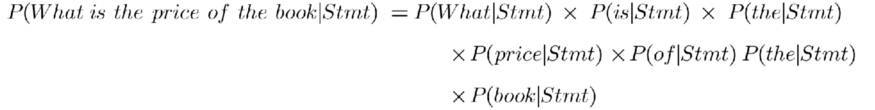


In [17]:
#Probability with laplace smoothing for all words in Statement Class

In [122]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ajay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [134]:
from nltk.tokenize import word_tokenize
new_sentence = 'what is the price of the book'
new_word_list = word_tokenize(new_sentence)
print (new_word_list)

['what', 'is', 'the', 'price', 'of', 'the', 'book']


<img src="image-equ-4.png">

~~~text
P(what is the price of the book|stmt) = 0.0277 * 0.0833 * 0.0555 * 0.0277 * 0.0277 * 0.0277 * 0.0555*0.0833
=1.2583314328337572e-11
~~~

In [127]:
prob_s_with_ls = []
for word in new_word_list:
    if word in freq_s.keys():
        count = freq_s[word]
    else:
        count = 0
    prob_s_with_ls.append((count + 1)/(total_cnts_features_s + total_features))
dict(zip(new_word_list,prob_s_with_ls))

{'what': 0.027777777777777776,
 'is': 0.08333333333333333,
 'the': 0.05555555555555555,
 'price': 0.027777777777777776,
 'of': 0.027777777777777776,
 'book': 0.08333333333333333}

In [128]:
#Probability with laplace smoothing for all words w.r.t Statement Class

In [129]:
prob_q_with_ls = []
for word in new_word_list:
    if word in freq_q.keys():
        count = freq_q[word]
    else:
        count = 0
    prob_q_with_ls.append((count + 1)/(total_cnts_features_q + total_features))
dict(zip(new_word_list,prob_q_with_ls))

{'what': 0.07692307692307693,
 'is': 0.07692307692307693,
 'the': 0.07692307692307693,
 'price': 0.02564102564102564,
 'of': 0.02564102564102564,
 'book': 0.07692307692307693}

<img src="image-equ-5.png">

~~~ text
= 0.0769 * 0.0769 * 0.0769*0.0256*0.0256*0.0769*0.0769
=1.7624289971722582e-09
P(Stmt|What is the price of the book) = P(what is the price of the book|Stmt)*P(Stmt)
= 1.2583314328337572e-11 * 0.5
=6.291657164168786e-12
P(Question|What is the price of the book) = P(what is the price of the book|Question)*P(Question)
=1.7624289971722582e-09 * 0.5
=8.812144985861291e-10
8.812144985861291e-10 > 6.291657164168786e-12
~~~
Therefore the new sentence ‘What is the price of the book’ will be classified as ‘Question’

### Classify Research  Paper based on Abstract Using Naive Bayes  

#### Problem Statement
<b> ABC organisation planning to organised Conferance on various subjects , Based on the past experance they are expeting  more then 3000 papers for presentation. Organiser wanted to classify all papers based on Abstract , and key word using Naive Bayes </b>

<li>Create the dataSet  of more then 1000 various subjects research papers</li>